In [1]:
import json

with open("/home/huy/Project/educAItion/data.json", "r", encoding="utf-8") as file:
    data = json.load(file)

question_count = sum(len(topic["questions"]) for chapter in data["data"] for topic in chapter["topics"])

print("Total number of questions:", question_count)


Total number of questions: 162


In [2]:


PROMPT_text = """
Hãy giải bài toán theo từng bước, và giải thích bước làm.
Hãy trả về kết quả dạng LaTeX cho các công thức toán học (để trong $...$ cho các biểu thức, số), bảng biến thiên, đồ thị,... nếu có.

=========
Đây là bài toán:
{problem}

=========

LƯU Ý: 
- Hãy giải bằng cách ngắn gọn, hiệu quả nhất.
- Hãy trình bày khoa học và dùng các ký hiệu toán học nếu có thể để thay cho chữ 
- Ví dụ dùng kí hiệu toán là dấu "hoặc", "và" khi giải phương trình, bất phương trình; Hay vẽ bảng biến thiên khảo sát hàm số hay xét dấu,.... 
- Nên xuống dòng khi cần thiết, tránh một dòng quá dài.
-Trả về dưới dạng tag : <solution>solution<solution> <answer>answer<answer> trong đó solution là cách giải, anser là kết quả cuối cùng theo yêu cầu bài toán.
-Trả về kết quả dưới dạng Latex
"""

In [8]:
from together import Together
import os
deepseek_api = "bc78c30583e4ad9887e42feada1c4ddc320378fc4b44f18d6a9cbdb97ac2ae1c"
client = Together(api_key=deepseek_api)

In [9]:

import re
import pandas as pd

from IPython.display import display, Latex

from tqdm import tqdm

def get_answer(problem):
        response = client.chat.completions.create(
                model="deepseek-ai/DeepSeek-R1",
                messages=[{"role": "user", "content": PROMPT_text.format(problem=problem)}],
                ).choices[0].message.content
        if response is None:
                return {"solution": "AI failed to generate a solution", "answer": "AI failed to generate an answer"}
        solution_match = re.search(r"<solution>(.*?)</solution>", response, re.DOTALL)
        answer_match = re.search(r"<answer>(.*?)</answer>", response, re.DOTALL)

        # Extracted values or default
        solution = solution_match.group(1) if solution_match else "No solution found"
        answer = answer_match.group(1) if answer_match else "No answer found"

        return {"solution": solution, "answer": answer}

In [ ]:
import time

rows = []
questions_list = [q for chapter in data["data"] for topic in chapter["topics"] for q in topic["questions"]]

for q in tqdm(questions_list[], desc="Processing Questions"):
    ai_response = get_answer(q["question"])  # API Call
    display(Latex(ai_response["solution"]))
    rows.append([
        q["question"], 
        q["solution"], 
        q["answer"], 
        ai_response["solution"], 
        ai_response["answer"]
    ])
    
    time.sleep(60 / 1.2)  # Sleep to respect 1.2 RPM

# Create DataFrame
df = pd.DataFrame(rows, columns=["Question", "Solution", "Answer", "AI Solution", "AI Answer"])


# Display DataFrame
display(df)

Processing Questions:   0%|          | 0/162 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

Processing Questions:   1%|          | 1/162 [01:33<4:11:22, 93.68s/it]

<IPython.core.display.Latex object>

Processing Questions:   1%|          | 2/162 [02:32<3:15:34, 73.34s/it]

<IPython.core.display.Latex object>

Processing Questions:   2%|▏         | 3/162 [03:37<3:03:46, 69.35s/it]

<IPython.core.display.Latex object>

Processing Questions:   2%|▏         | 4/162 [04:40<2:55:52, 66.79s/it]

<IPython.core.display.Latex object>

Processing Questions:   3%|▎         | 5/162 [05:47<2:54:45, 66.79s/it]

<IPython.core.display.Latex object>

Processing Questions:   4%|▎         | 6/162 [07:07<3:06:08, 71.60s/it]

<IPython.core.display.Latex object>

Processing Questions:   4%|▍         | 7/162 [08:15<3:01:22, 70.21s/it]

<IPython.core.display.Latex object>

Processing Questions:   5%|▍         | 8/162 [09:31<3:04:48, 72.00s/it]

<IPython.core.display.Latex object>

Processing Questions:   6%|▌         | 9/162 [10:29<2:52:47, 67.76s/it]

<IPython.core.display.Latex object>

Processing Questions:   6%|▌         | 10/162 [11:28<2:44:30, 64.94s/it]

<IPython.core.display.Latex object>

Processing Questions:   7%|▋         | 11/162 [12:35<2:45:17, 65.68s/it]

<IPython.core.display.Latex object>

Processing Questions:   7%|▋         | 12/162 [13:48<2:49:50, 67.93s/it]

<IPython.core.display.Latex object>

Processing Questions:   8%|▊         | 13/162 [14:53<2:46:16, 66.96s/it]

<IPython.core.display.Latex object>

Processing Questions:   9%|▊         | 14/162 [16:07<2:50:47, 69.24s/it]

<IPython.core.display.Latex object>

Processing Questions:   9%|▉         | 15/162 [17:16<2:49:19, 69.11s/it]

<IPython.core.display.Latex object>

Processing Questions:  10%|▉         | 16/162 [18:31<2:52:32, 70.91s/it]

<IPython.core.display.Latex object>

Processing Questions:  10%|█         | 17/162 [19:45<2:53:05, 71.62s/it]

<IPython.core.display.Latex object>

Processing Questions:  11%|█         | 18/162 [20:54<2:50:03, 70.86s/it]

<IPython.core.display.Latex object>

Processing Questions:  12%|█▏        | 19/162 [21:57<2:43:24, 68.56s/it]

<IPython.core.display.Latex object>

Processing Questions:  12%|█▏        | 20/162 [23:24<2:55:44, 74.26s/it]

<IPython.core.display.Latex object>

Processing Questions:  13%|█▎        | 21/162 [24:27<2:46:11, 70.72s/it]

<IPython.core.display.Latex object>

Processing Questions:  14%|█▎        | 22/162 [25:34<2:42:48, 69.77s/it]

<IPython.core.display.Latex object>

Processing Questions:  14%|█▍        | 23/162 [26:43<2:40:44, 69.39s/it]

<IPython.core.display.Latex object>

Processing Questions:  15%|█▍        | 24/162 [27:58<2:43:38, 71.15s/it]

<IPython.core.display.Latex object>

Processing Questions:  15%|█▌        | 25/162 [29:13<2:45:03, 72.29s/it]

<IPython.core.display.Latex object>

Processing Questions:  16%|█▌        | 26/162 [30:16<2:37:24, 69.44s/it]

<IPython.core.display.Latex object>

Processing Questions:  17%|█▋        | 27/162 [31:21<2:33:17, 68.13s/it]

<IPython.core.display.Latex object>

Processing Questions:  17%|█▋        | 28/162 [32:40<2:39:41, 71.51s/it]

<IPython.core.display.Latex object>

Processing Questions:  18%|█▊        | 29/162 [33:58<2:42:46, 73.43s/it]

<IPython.core.display.Latex object>

Processing Questions:  19%|█▊        | 30/162 [35:56<3:10:54, 86.78s/it]

<IPython.core.display.Latex object>

Processing Questions:  19%|█▉        | 31/162 [37:04<2:57:20, 81.23s/it]

<IPython.core.display.Latex object>

Processing Questions:  20%|█▉        | 32/162 [38:14<2:48:41, 77.86s/it]

<IPython.core.display.Latex object>

Processing Questions:  20%|██        | 33/162 [39:37<2:50:05, 79.11s/it]

<IPython.core.display.Latex object>

Processing Questions:  21%|██        | 34/162 [40:51<2:45:31, 77.59s/it]

<IPython.core.display.Latex object>

Processing Questions:  22%|██▏       | 35/162 [42:18<2:50:46, 80.68s/it]

<IPython.core.display.Latex object>

Processing Questions:  22%|██▏       | 36/162 [43:26<2:41:05, 76.71s/it]

<IPython.core.display.Latex object>

Processing Questions:  23%|██▎       | 37/162 [44:33<2:33:38, 73.74s/it]

<IPython.core.display.Latex object>

Processing Questions:  23%|██▎       | 38/162 [45:38<2:27:01, 71.14s/it]

<IPython.core.display.Latex object>

Processing Questions:  24%|██▍       | 39/162 [46:40<2:20:22, 68.48s/it]

<IPython.core.display.Latex object>

Processing Questions:  25%|██▍       | 40/162 [47:51<2:20:33, 69.13s/it]

<IPython.core.display.Latex object>

Processing Questions:  25%|██▌       | 41/162 [50:01<2:56:23, 87.46s/it]

<IPython.core.display.Latex object>

Processing Questions:  26%|██▌       | 42/162 [51:14<2:46:15, 83.13s/it]

<IPython.core.display.Latex object>

Processing Questions:  27%|██▋       | 43/162 [52:18<2:33:47, 77.54s/it]

<IPython.core.display.Latex object>

Processing Questions:  27%|██▋       | 44/162 [53:46<2:38:34, 80.63s/it]

<IPython.core.display.Latex object>

Processing Questions:  28%|██▊       | 45/162 [55:15<2:42:08, 83.15s/it]

<IPython.core.display.Latex object>

Processing Questions:  28%|██▊       | 46/162 [56:32<2:36:52, 81.14s/it]

<IPython.core.display.Latex object>

Processing Questions:  29%|██▉       | 47/162 [58:03<2:41:25, 84.22s/it]

<IPython.core.display.Latex object>

Processing Questions:  30%|██▉       | 48/162 [59:15<2:32:54, 80.48s/it]

<IPython.core.display.Latex object>

Processing Questions:  30%|███       | 49/162 [1:01:03<2:47:04, 88.71s/it]

<IPython.core.display.Latex object>

Processing Questions:  31%|███       | 50/162 [1:02:26<2:42:35, 87.10s/it]

<IPython.core.display.Latex object>

Processing Questions:  31%|███▏      | 51/162 [1:03:50<2:39:20, 86.13s/it]

<IPython.core.display.Latex object>

Processing Questions:  32%|███▏      | 52/162 [1:06:14<3:09:36, 103.43s/it]

<IPython.core.display.Latex object>

Processing Questions:  33%|███▎      | 53/162 [1:07:32<2:54:04, 95.82s/it] 

<IPython.core.display.Latex object>

Processing Questions:  33%|███▎      | 54/162 [1:09:09<2:53:21, 96.31s/it]

<IPython.core.display.Latex object>

Processing Questions:  34%|███▍      | 55/162 [1:10:28<2:42:06, 90.90s/it]

<IPython.core.display.Latex object>

Processing Questions:  35%|███▍      | 56/162 [1:11:53<2:37:36, 89.21s/it]

<IPython.core.display.Latex object>

Processing Questions:  35%|███▌      | 57/162 [1:13:02<2:25:21, 83.06s/it]

<IPython.core.display.Latex object>

Processing Questions:  36%|███▌      | 58/162 [1:14:09<2:15:58, 78.45s/it]

<IPython.core.display.Latex object>

Processing Questions:  36%|███▋      | 59/162 [1:15:22<2:11:49, 76.79s/it]

<IPython.core.display.Latex object>

Processing Questions:  37%|███▋      | 60/162 [1:16:54<2:18:00, 81.18s/it]

<IPython.core.display.Latex object>

Processing Questions:  38%|███▊      | 61/162 [1:18:06<2:12:15, 78.57s/it]

<IPython.core.display.Latex object>

Processing Questions:  38%|███▊      | 62/162 [1:19:42<2:19:41, 83.82s/it]

<IPython.core.display.Latex object>

Processing Questions:  39%|███▉      | 63/162 [1:20:59<2:14:38, 81.61s/it]

<IPython.core.display.Latex object>

Processing Questions:  40%|███▉      | 64/162 [1:23:11<2:37:58, 96.72s/it]

<IPython.core.display.Latex object>

Processing Questions:  40%|████      | 65/162 [1:26:02<3:12:26, 119.03s/it]

<IPython.core.display.Latex object>

Processing Questions:  41%|████      | 66/162 [1:27:07<2:44:49, 103.02s/it]

<IPython.core.display.Latex object>

Processing Questions:  41%|████▏     | 67/162 [1:28:11<2:24:19, 91.15s/it] 

<IPython.core.display.Latex object>

Processing Questions:  42%|████▏     | 68/162 [1:29:14<2:09:47, 82.85s/it]

<IPython.core.display.Latex object>

Processing Questions:  43%|████▎     | 69/162 [1:30:58<2:18:07, 89.12s/it]

<IPython.core.display.Latex object>

Processing Questions:  43%|████▎     | 70/162 [1:32:16<2:11:30, 85.76s/it]

<IPython.core.display.Latex object>

Processing Questions:  44%|████▍     | 71/162 [1:33:23<2:01:43, 80.26s/it]

<IPython.core.display.Latex object>

Processing Questions:  44%|████▍     | 72/162 [1:34:40<1:58:32, 79.03s/it]

<IPython.core.display.Latex object>

Processing Questions:  45%|████▌     | 73/162 [1:35:40<1:48:57, 73.46s/it]

<IPython.core.display.Latex object>

Processing Questions:  46%|████▌     | 74/162 [1:37:41<2:08:44, 87.78s/it]

<IPython.core.display.Latex object>

Processing Questions:  46%|████▋     | 75/162 [1:39:41<2:21:10, 97.36s/it]

<IPython.core.display.Latex object>

Processing Questions:  47%|████▋     | 76/162 [1:41:09<1:54:28, 79.87s/it]


APIError: Error code: 402 - {"message": "Credit limit exceeded. Please navigate to https://api.together.xyz/settings/billing to upgrade your plan.", "type_": "credit_limit"}

In [10]:
for q in tqdm(questions_list[76:], desc="Processing Questions"):
    ai_response = get_answer(q["question"])  # API Call
    display(Latex(ai_response["solution"]))
    rows.append([
        q["question"], 
        q["solution"], 
        q["answer"], 
        ai_response["solution"], 
        ai_response["answer"]
    ])
    
    time.sleep(60 / 1.2)  # Sleep to respect 1.2 RPM

# Create DataFrame
df = pd.DataFrame(rows, columns=["Question", "Solution", "Answer", "AI Solution", "AI Answer"])


# Display DataFrame
display(df)

Processing Questions:   0%|          | 0/86 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

Processing Questions:   1%|          | 1/86 [01:16<1:48:21, 76.49s/it]

<IPython.core.display.Latex object>

Processing Questions:   2%|▏         | 2/86 [02:30<1:44:38, 74.74s/it]

<IPython.core.display.Latex object>

Processing Questions:   3%|▎         | 3/86 [04:00<1:53:22, 81.96s/it]

<IPython.core.display.Latex object>

Processing Questions:   5%|▍         | 4/86 [05:05<1:43:00, 75.37s/it]

<IPython.core.display.Latex object>

Processing Questions:   6%|▌         | 5/86 [06:12<1:37:40, 72.36s/it]

<IPython.core.display.Latex object>

Processing Questions:   7%|▋         | 6/86 [07:20<1:34:28, 70.85s/it]

<IPython.core.display.Latex object>

Processing Questions:   8%|▊         | 7/86 [08:29<1:32:25, 70.20s/it]

<IPython.core.display.Latex object>

Processing Questions:   9%|▉         | 8/86 [09:34<1:28:56, 68.42s/it]

<IPython.core.display.Latex object>

Processing Questions:  10%|█         | 9/86 [10:42<1:27:36, 68.26s/it]

<IPython.core.display.Latex object>

Processing Questions:  12%|█▏        | 10/86 [12:01<1:30:58, 71.82s/it]

<IPython.core.display.Latex object>

Processing Questions:  13%|█▎        | 11/86 [13:22<1:33:12, 74.57s/it]

<IPython.core.display.Latex object>

Processing Questions:  14%|█▍        | 12/86 [14:30<1:29:15, 72.37s/it]

<IPython.core.display.Latex object>

Processing Questions:  15%|█▌        | 13/86 [15:44<1:28:42, 72.91s/it]

<IPython.core.display.Latex object>

Processing Questions:  16%|█▋        | 14/86 [16:47<1:24:07, 70.11s/it]

<IPython.core.display.Latex object>

Processing Questions:  17%|█▋        | 15/86 [17:51<1:20:37, 68.14s/it]

<IPython.core.display.Latex object>

Processing Questions:  19%|█▊        | 16/86 [19:08<1:22:47, 70.96s/it]

<IPython.core.display.Latex object>

Processing Questions:  20%|█▉        | 17/86 [20:13<1:19:30, 69.14s/it]

<IPython.core.display.Latex object>

Processing Questions:  21%|██        | 18/86 [21:18<1:16:53, 67.84s/it]

<IPython.core.display.Latex object>

Processing Questions:  22%|██▏       | 19/86 [22:35<1:18:45, 70.54s/it]

<IPython.core.display.Latex object>

Processing Questions:  23%|██▎       | 20/86 [23:43<1:16:48, 69.83s/it]

<IPython.core.display.Latex object>

Processing Questions:  24%|██▍       | 21/86 [26:04<1:38:41, 91.10s/it]

<IPython.core.display.Latex object>

Processing Questions:  26%|██▌       | 22/86 [27:11<1:29:35, 83.99s/it]

<IPython.core.display.Latex object>

Processing Questions:  27%|██▋       | 23/86 [28:14<1:21:28, 77.59s/it]

<IPython.core.display.Latex object>

Processing Questions:  28%|██▊       | 24/86 [29:25<1:18:14, 75.71s/it]

<IPython.core.display.Latex object>

Processing Questions:  29%|██▉       | 25/86 [30:38<1:15:54, 74.67s/it]

<IPython.core.display.Latex object>

Processing Questions:  30%|███       | 26/86 [31:45<1:12:32, 72.54s/it]

<IPython.core.display.Latex object>

Processing Questions:  31%|███▏      | 27/86 [32:51<1:09:24, 70.59s/it]

<IPython.core.display.Latex object>

Processing Questions:  33%|███▎      | 28/86 [34:12<1:11:10, 73.63s/it]

<IPython.core.display.Latex object>

Processing Questions:  34%|███▎      | 29/86 [35:29<1:10:49, 74.55s/it]

<IPython.core.display.Latex object>

Processing Questions:  35%|███▍      | 30/86 [36:33<1:06:49, 71.60s/it]

<IPython.core.display.Latex object>

Processing Questions:  36%|███▌      | 31/86 [37:54<1:08:02, 74.23s/it]

<IPython.core.display.Latex object>

Processing Questions:  37%|███▋      | 32/86 [39:15<1:08:50, 76.49s/it]

<IPython.core.display.Latex object>

Processing Questions:  38%|███▊      | 33/86 [40:23<1:05:13, 73.83s/it]

<IPython.core.display.Latex object>

Processing Questions:  40%|███▉      | 34/86 [41:36<1:03:48, 73.63s/it]

<IPython.core.display.Latex object>

Processing Questions:  41%|████      | 35/86 [42:40<1:00:07, 70.74s/it]

<IPython.core.display.Latex object>

Processing Questions:  42%|████▏     | 36/86 [43:47<58:01, 69.64s/it]  

<IPython.core.display.Latex object>

Processing Questions:  43%|████▎     | 37/86 [45:08<59:29, 72.84s/it]

<IPython.core.display.Latex object>

Processing Questions:  44%|████▍     | 38/86 [46:30<1:00:29, 75.61s/it]

<IPython.core.display.Latex object>

Processing Questions:  45%|████▌     | 39/86 [47:38<57:27, 73.36s/it]  

<IPython.core.display.Latex object>

Processing Questions:  47%|████▋     | 40/86 [48:54<56:58, 74.32s/it]

<IPython.core.display.Latex object>

Processing Questions:  48%|████▊     | 41/86 [50:02<54:14, 72.31s/it]

<IPython.core.display.Latex object>

Processing Questions:  49%|████▉     | 42/86 [51:02<50:18, 68.61s/it]

<IPython.core.display.Latex object>

Processing Questions:  50%|█████     | 43/86 [52:04<47:47, 66.69s/it]

<IPython.core.display.Latex object>

Processing Questions:  51%|█████     | 44/86 [53:13<47:03, 67.22s/it]

<IPython.core.display.Latex object>

Processing Questions:  52%|█████▏    | 45/86 [54:21<46:14, 67.68s/it]

<IPython.core.display.Latex object>

Processing Questions:  53%|█████▎    | 46/86 [55:33<46:00, 69.02s/it]

<IPython.core.display.Latex object>

Processing Questions:  55%|█████▍    | 47/86 [56:47<45:39, 70.23s/it]

<IPython.core.display.Latex object>

Processing Questions:  56%|█████▌    | 48/86 [58:19<48:38, 76.81s/it]

<IPython.core.display.Latex object>

Processing Questions:  57%|█████▋    | 49/86 [59:31<46:37, 75.61s/it]

<IPython.core.display.Latex object>

Processing Questions:  58%|█████▊    | 50/86 [1:00:43<44:39, 74.43s/it]

<IPython.core.display.Latex object>

Processing Questions:  59%|█████▉    | 51/86 [1:02:02<44:08, 75.68s/it]

<IPython.core.display.Latex object>

Processing Questions:  60%|██████    | 52/86 [1:03:13<42:05, 74.27s/it]

<IPython.core.display.Latex object>

Processing Questions:  62%|██████▏   | 53/86 [1:04:19<39:33, 71.94s/it]

<IPython.core.display.Latex object>

Processing Questions:  63%|██████▎   | 54/86 [1:05:27<37:39, 70.60s/it]

<IPython.core.display.Latex object>

Processing Questions:  64%|██████▍   | 55/86 [1:06:35<36:10, 70.00s/it]

<IPython.core.display.Latex object>

Processing Questions:  65%|██████▌   | 56/86 [1:07:39<34:02, 68.08s/it]

<IPython.core.display.Latex object>

Processing Questions:  66%|██████▋   | 57/86 [1:08:41<32:01, 66.27s/it]

<IPython.core.display.Latex object>

Processing Questions:  67%|██████▋   | 58/86 [1:09:48<31:00, 66.46s/it]

<IPython.core.display.Latex object>

Processing Questions:  69%|██████▊   | 59/86 [1:12:20<41:24, 92.02s/it]

<IPython.core.display.Latex object>

Processing Questions:  70%|██████▉   | 60/86 [1:13:58<40:45, 94.04s/it]

<IPython.core.display.Latex object>

Processing Questions:  71%|███████   | 61/86 [1:15:26<38:26, 92.26s/it]

<IPython.core.display.Latex object>

Processing Questions:  72%|███████▏  | 62/86 [1:16:33<33:47, 84.49s/it]

<IPython.core.display.Latex object>

Processing Questions:  73%|███████▎  | 63/86 [1:17:49<31:23, 81.87s/it]

<IPython.core.display.Latex object>

Processing Questions:  74%|███████▍  | 64/86 [1:18:54<28:15, 77.05s/it]

<IPython.core.display.Latex object>

Processing Questions:  76%|███████▌  | 65/86 [1:20:33<29:16, 83.66s/it]

<IPython.core.display.Latex object>

Processing Questions:  77%|███████▋  | 66/86 [1:21:54<27:34, 82.74s/it]

<IPython.core.display.Latex object>

Processing Questions:  78%|███████▊  | 67/86 [1:23:04<25:01, 79.02s/it]

<IPython.core.display.Latex object>

Processing Questions:  79%|███████▉  | 68/86 [1:24:18<23:14, 77.47s/it]

<IPython.core.display.Latex object>

Processing Questions:  80%|████████  | 69/86 [1:25:35<21:54, 77.33s/it]

<IPython.core.display.Latex object>

Processing Questions:  81%|████████▏ | 70/86 [1:26:59<21:09, 79.36s/it]

<IPython.core.display.Latex object>

Processing Questions:  83%|████████▎ | 71/86 [1:28:16<19:38, 78.60s/it]

<IPython.core.display.Latex object>

Processing Questions:  84%|████████▎ | 72/86 [1:29:33<18:14, 78.16s/it]

<IPython.core.display.Latex object>

Processing Questions:  85%|████████▍ | 73/86 [1:30:47<16:39, 76.87s/it]

<IPython.core.display.Latex object>

Processing Questions:  86%|████████▌ | 74/86 [1:32:01<15:13, 76.12s/it]

<IPython.core.display.Latex object>

Processing Questions:  87%|████████▋ | 75/86 [1:33:14<13:46, 75.12s/it]

<IPython.core.display.Latex object>

Processing Questions:  88%|████████▊ | 76/86 [1:34:44<13:15, 79.60s/it]

<IPython.core.display.Latex object>

Processing Questions:  90%|████████▉ | 77/86 [1:36:05<11:58, 79.79s/it]

<IPython.core.display.Latex object>

Processing Questions:  91%|█████████ | 78/86 [1:37:12<10:09, 76.24s/it]

<IPython.core.display.Latex object>

Processing Questions:  92%|█████████▏| 79/86 [1:38:37<09:09, 78.57s/it]

<IPython.core.display.Latex object>

Processing Questions:  93%|█████████▎| 80/86 [1:40:25<08:45, 87.60s/it]

<IPython.core.display.Latex object>

Processing Questions:  94%|█████████▍| 81/86 [1:41:38<06:55, 83.09s/it]

<IPython.core.display.Latex object>

Processing Questions:  95%|█████████▌| 82/86 [1:43:29<06:05, 91.39s/it]

<IPython.core.display.Latex object>

Processing Questions:  97%|█████████▋| 83/86 [1:44:50<04:24, 88.33s/it]

<IPython.core.display.Latex object>

Processing Questions:  98%|█████████▊| 84/86 [1:45:56<02:43, 81.60s/it]

<IPython.core.display.Latex object>

Processing Questions:  99%|█████████▉| 85/86 [1:47:06<01:18, 78.30s/it]

<IPython.core.display.Latex object>

Processing Questions: 100%|██████████| 86/86 [1:48:22<00:00, 75.61s/it]


,Question,Solution,Answer,AI Solution,AI Answer
0,Cho hai số phức $z_1 = 1 + 10i$ và $z_2 = 9 – ...,Ta có: $z = z_1 + z_2 = (1 + 10i) + ( 9 – 2i) ...,10,\nĐể tìm phần thực của số phức $z_1$ khi biết ...,\n$\boxed{1}$\n
1,Hãy tính số phức z. Biết rằng: $z = 10i – ( 2 ...,Ta có: $z = 10i - (2 + 2i).i = 10i – 2i + 2 = ...,2 + 8i,"\nĐể tính số phức \( z \), ta thực hiện các bư...",\n\( z = \boxed{2 + 8i} \)\n
2,Cho hai số phức $z = -2 + 3yi$; $z’ = ( x + 1)...,Để $z + i = z’ + 2$ => - 2 + 3yi + i = ( x + 1...,"x = -5, y = -5/3","\nĐể tìm $x, y \in \mathbb{R}$ thỏa mãn $z + i...",\nVậy nghiệm của bài toán là $\boxed{x = -5}$ ...
3,Số nào trong các số phức sau là số thuần ảo? A...,Ta xét các phương án:A.(√2 + i) - (1 + √2i)= (...,B. ( 8 + 2i) + (- 8 + 2i),\nXét từng phương án:\n\n**A.** $(\sqrt{2} + i...,$\boxed{B}$
4,Tính giá trị của P = i^{105} + i^{23} + i^{20}...,"Ta có: $i^2 = -1 \Rightarrow i^4 = 1$. Do đó, ...",2,\nTa có chu kỳ của lũy thừa số phức $i$ là 4:\...,\n$\boxed{2}$\n
...,...,...,...,...,...
157,Gọi (H) là hình phẳng giới hạn bởi các đường y...,Phương trình hoành độ giao điểm:\n$2x-x^2 = 0 ...,16/15pi,\nĐể tính thể tích khối tròn xoay tạo bởi hình...,\n$\boxed{\dfrac{16\pi}{15}}$\n
158,Tính thể tích khối tròn xoay được giới hạn bởi...,Thể tích khối tròn xoay được giới hạn bởi các ...,46/15pi,\nĐể tính thể tích khối tròn xoay tạo bởi các ...,\nThể tích khối tròn xoay là \(\boxed{\dfrac{4...
159,Cho hình phẳng giới hạn bởi các đường y=\sqrt{...,Giải phương trình $\sqrt{x} = x \Leftrightarro...,pi/6,\nĐể tính thể tích khối tròn xoay tạo bởi hình...,\n$\boxed{\dfrac{\pi}{6}}$\n
160,Gọi (H) là hình phẳng giới hạn bởi các đường y...,Thể tích khối tròn xoay được giới hạn bởi các ...,pi - pi^2/4,\nĐể tính thể tích khối tròn xoay tạo bởi hình...,\nThể tích khối tròn xoay là $\boxed{\pi - \df...


In [11]:
df.to_csv("deepseek_r1_test_results.csv")

# Test results

In [7]:
import pandas as pd
from abc import ABC, abstractmethod
from google import genai

df = pd.read_csv("deepseek_r1_test_results.csv")
gemini_api_key = os.getenv("GEMINI_API_KEY")


class LLM(ABC):
    @abstractmethod
    def generate(self, prompt: str) -> str:
        pass
    
    @abstractmethod
    def stream_generate(self, prompt: str):
        
class GeminiAI(LLM):
    def __init__(self):
        self.client = genai.Client(api_key=gemini_api_key)
    
    def generate(self, prompt: str) -> str:
        response = self.client.models.generate_content(model="gemini-2.0-flash",contents=[prompt])
        return response.text
    

    def stream_generate(self, prompt: str):
        response = self.client.models.generate_content_stream(model="gemini-2.0-flash",contents=[prompt])
        
        for chunk in response:
            if chunk.text:
                yield chunk.text
        pass
model = GeminiAI()

In [8]:
import time
import re
import pandas as pd
from tqdm import tqdm

# Function to classify AI answer correctness
def check_answer(correct_answer, ai_answer):
    prompt = (f'''Compare the correct answer '{correct_answer}' with the AI-generated answer '{ai_answer}'. 
              Categorize the result into one of the following:
              1. 'Both Correct' - AI answer is meaningfully correct.
              2. 'Both Incorrect' - AI uses incorrect reasoning, both are incorrect.
              3. 'Correct Answer, Wrong Explanation' - The answer is correct, but the reasoning is flawed.
              4. 'Wrong Answer, Correct Explanation' - The answer is wrong, but the reasoning is valid.
              5. 'AI Not Generated' - AI did not produce an answer.
              
              Be lenient in formatting and minor differences as long as the meaning aligns. 
              Return only the category and a brief explanation.
              ''')

    global last_api_call_time

    # Enforce rate limit (one request every 4 seconds)
    elapsed_time = time.time() - last_api_call_time
    if elapsed_time < 4:
        time.sleep(4 - elapsed_time)

    response = model.generate(prompt)  # API call
    last_api_call_time = time.time()

    if not response:
        return "AI Not Generated", "AI failed to generate a response"

    # Ensure response is a string before applying regex
    response = str(response)

    match = re.search(r"(Both Correct|Both Incorrect|Correct Answer, Wrong Explanation|Wrong Answer, Correct Explanation|AI Not Generated)", response)
    explanation_match = re.search(r"Explanation:\s*(.*)", response, re.DOTALL)

    category = match.group(1) if match else "Unknown"
    explanation = explanation_match.group(1).strip() if explanation_match else "No explanation provided"

    return category, explanation

# Initialize rate limit tracking
last_api_call_time = time.time()

# Ensure necessary columns exist
if "Category" not in df.columns:
    df["Category"] = None
if "Explanation" not in df.columns:
    df["Explanation"] = None

# Process only unanswered rows
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Checking AI Answers"):
    if pd.notna(row["Category"]):  # Skip rows already processed
        continue
    
    category, explanation = check_answer(row["Answer"], row["AI Answer"])
    df.at[index, "Category"] = category
    df.at[index, "Explanation"] = explanation

    print(f"Processed {index + 1}/{df.shape[0]} - Category: {category}")  # Progress tracking

# Display updated DataFrame
display(df)


Checking AI Answers: 100%|██████████| 162/162 [03:45<00:00,  1.39s/it]


,Unnamed: 0,Question,Solution,Answer,AI Solution,AI Answer,Category,Explanation
0,0,Cho hai số phức $z_1 = 1 + 10i$ và $z_2 = 9 – ...,Ta có: $z = z_1 + z_2 = (1 + 10i) + ( 9 – 2i) ...,10,"\nĐể giải bài toán, ta thực hiện các bước sau:...",\nPhần thực của số phức $z$ là $10$.\n,Both Correct,No explanation provided
1,1,Hãy tính số phức z. Biết rằng: $z = 10i – ( 2 ...,Ta có: $z = 10i - (2 + 2i).i = 10i – 2i + 2 = ...,2 + 8i,"\nĐể tính số phức $z$, ta sẽ thực hiện các bướ...",\n$z = 2 + 8i$\n,Both Correct,No explanation provided
2,2,Cho hai số phức $z = -2 + 3yi$; $z’ = ( x + 1)...,Để $z + i = z’ + 2$ => - 2 + 3yi + i = ( x + 1...,"x = -5, y = -5/3","\nĐể giải bài toán, ta bắt đầu từ phương trình...","\n$x = -5, \quad y = -\frac{5}{3}$\n",Both Correct,No explanation provided
3,3,Số nào trong các số phức sau là số thuần ảo? A...,Ta xét các phương án:A.(√2 + i) - (1 + √2i)= (...,B. ( 8 + 2i) + (- 8 + 2i),\nĐể xác định số nào trong các số phức đã cho ...,\nSố thuần ảo là: B. $(8 + 2i) + (-8 + 2i) = 4...,"Correct Answer, Wrong Explanation",No explanation provided
4,4,Tính giá trị của P = i^{105} + i^{23} + i^{20}...,"Ta có: $i^2 = -1 \Rightarrow i^4 = 1$. Do đó, ...",2,\nĐể tính giá trị của biểu thức $P = i^{105} +...,\nP = 2\n,Both Correct,No explanation provided
...,...,...,...,...,...,...,...,...
157,157,Gọi (H) là hình phẳng giới hạn bởi các đường y...,Phương trình hoành độ giao điểm:\n$2x-x^2 = 0 ...,16/15pi,\nĐể tính thể tích của khối tròn xoay được tạo...,\n$V = \frac{16\pi}{15}$\n,Both Correct,No explanation provided
158,158,Tính thể tích khối tròn xoay được giới hạn bởi...,Thể tích khối tròn xoay được giới hạn bởi các ...,46/15pi,\nĐể tính thể tích khối tròn xoay được giới hạ...,\n$V = \frac{46\pi}{15}$\n,Both Correct,No explanation provided
159,159,Cho hình phẳng giới hạn bởi các đường y=\sqrt{...,Giải phương trình $\sqrt{x} = x \Leftrightarro...,pi/6,\nĐể tính thể tích khối tròn xoay tạo ra khi h...,\n$V = \frac{\pi}{6}$\n,Both Correct,No explanation provided
160,160,Gọi (H) là hình phẳng giới hạn bởi các đường y...,Thể tích khối tròn xoay được giới hạn bởi các ...,pi - pi^2/4,\nĐể tính thể tích của khối tròn xoay được tạo...,\n$V = \pi - \frac{\pi^2}{4}$\n,Both Correct,No explanation provided


Statistical Summary of AI Answer Classification:
Both Correct                         91
Correct Answer, Wrong Explanation    55
Both Incorrect                       14
AI Not Generated                      2
Name: Category, dtype: int64

Percentage Distribution:
Both Correct                         56.172840
Correct Answer, Wrong Explanation    33.950617
Both Incorrect                        8.641975
AI Not Generated                      1.234568
Name: Category, dtype: float64


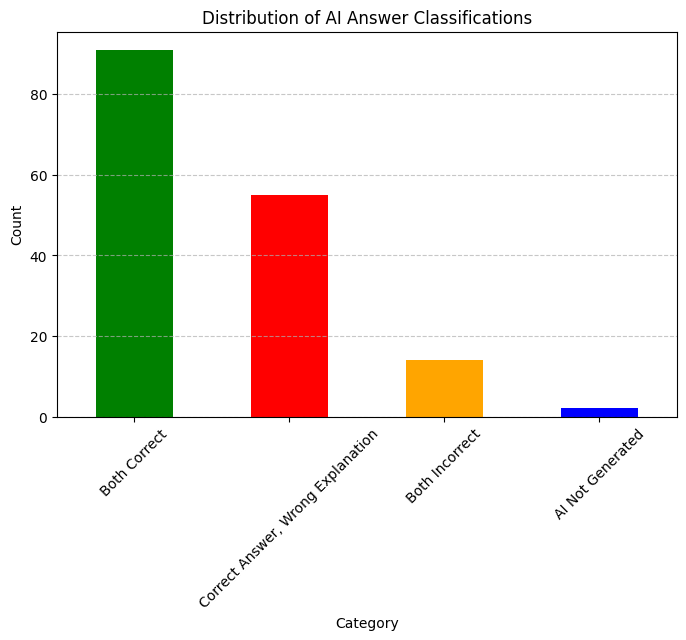

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each classification category
category_counts = df["Category"].value_counts()

# Compute percentages
category_percentages = (category_counts / len(df)) * 100

# Display statistical summary
print("Statistical Summary of AI Answer Classification:")
print(category_counts)
print("\nPercentage Distribution:")
print(category_percentages)

# Plot bar chart for better visualization
plt.figure(figsize=(8, 5))
category_counts.plot(kind="bar", color=["green", "red", "orange", "blue", "gray"])
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of AI Answer Classifications")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [11]:
df.to_csv("deepseek_r1_test_results.csv")